Polarimeter_main.py

Ein
[[1]
 [0]]

E3 = Eout =:
[[-0.25883938+0.00116476j]
 [-0.96534363-0.03335422j]]

Length of PX_qwpcol = 
2048

Length of X1 = 
2048

X1 = 
[582.99476704-0.j           2.42646857-1.07082262j
   2.55479195-2.17746015j ...   2.82145223+3.34795007j
   2.55479195+2.17746015j   2.42646857+1.07082262j]

Length of Shifted_X1 = 
2048

Length of Shifted_f = 
2048

arangen = 
[   0    1    2 ... 2045 2046 2047]



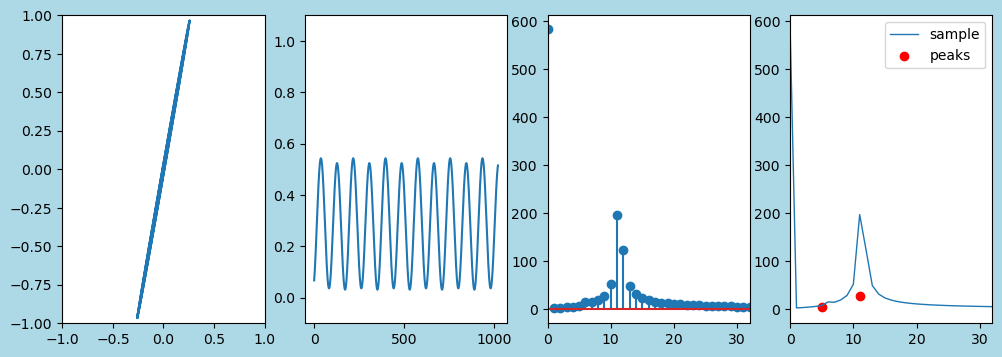

In [3]:
#Polarimeter_main.py

def findpeaks(x, y, n, w):
    index_all = list(signal.argrelmax(y, order=w))               
    index = []                                                      
    peaks = []                                                     
 

    for i in range(n):
        index.append(index_all[0][i])
        peaks.append(y[index_all[0][i]])
    index = np.array(index) * x[1]                                 
    return index, peaks

print('Polarimeter_main.py')

import numpy as np

from scipy.fft import fft, fftshift
from scipy import signal

import matplotlib.pyplot as plt
import Polarimeter_def



Ein = np.array([[1],[0]])
#Ein = np.array([[0],[1]])

print('')
print('Ein')
print(Ein)
print('')

E1 = Ein

theta1 = 105

E2 = Polarimeter_def.faradayrotaor(theta1,E1)



#Waveplate

theta2 = 2

phase2 = 2 # degree. QWP, 90



E3 = Polarimeter_def.waveplate(phase2,theta2,E2)

Eout = E3

print('E3 = Eout =:')
print(Eout)
print('')

m = 256

Eoutx_col = np.zeros(m);
Eouty_col = np.zeros(m);


for ii in range(m):

    opl1 = 0.05 * ii

    Eout_propagate=Polarimeter_def.propagate(opl1,Eout)

    Eoutx_col[ii] = np.real(Eout_propagate[0,0])   
    Eouty_col[ii] = np.real(Eout_propagate[1,0])


n = 2048
thetacol = np.zeros(n);
PX_qwpcol = np.zeros(n);


# Assume QWP

phase_qwp = 90 # degree. QWP


for jj in range(n):
    
    theta_var = 0.5 * jj

    Eout_qwp = Polarimeter_def.waveplate(phase_qwp,theta_var,Eout)
    
    thetacol[jj]=theta_var
    PX_qwpcol[jj] = abs(Eout_qwp[0,0])**2 # Linear Polarization Component



len_PX_qwpcol = len(PX_qwpcol)
print('Length of PX_qwpcol = ')
print(len_PX_qwpcol)
print('')

X1 = fft(PX_qwpcol)
lenX1 = len(X1)

print('Length of X1 = ')
print(lenX1)
print('')

df = 1/lenX1

Shifted_X1 = fftshift(X1)
print('X1 = ')
print(X1)
print('')


len_Shifted_X1 = len(Shifted_X1)

print('Length of Shifted_X1 = ')
print(len_Shifted_X1)
print('')


Shifted_sampleIndex = np.arange(-lenX1//2, lenX1//2)

Shifted_f = Shifted_sampleIndex*df

len_Shifted_f = len(Shifted_f)

print('Length of Shifted_f = ')
print(len_Shifted_f)
print('')

arangen = np.arange(lenX1)

print('arangen = ')
print(arangen)
print('')


fig = plt.figure(figsize = (12,4), facecolor='lightblue')
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.plot(Eoutx_col, Eouty_col)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

ax2.plot(thetacol,PX_qwpcol, "-")
ax2.set_ylim(-0.1,1.1)


#ax3.stem(Shifted_f, np.abs(Shifted_X1)/N, use_line_collection=True)

ax3.stem(arangen, np.abs(X1))

#ax3.stem(freq, np.abs(X1), 'b', markerfmt=" ", basefmt="-b")
ax3.set_xlim(0,32)

#ax3.plot(Shifted_f, np.abs(Shifted_X1)/o)#, use_line_collection=True)

# Assume this light hits rotating qwp and fixed polarizer.

index, peaks = findpeaks(arangen, X1, 4, 2)

ax4.plot(arangen, np.abs(X1),label='sample', lw=1)
ax4.scatter(index, peaks, label='peaks', color='red')
ax4.legend()
ax4.set_xlim(0,32)

plt.show()